In [10]:
# Length of a vector
import numpy as np

def compute_vector_length(vector):
    len_of_vector = np.sqrt(np.sum([i**2 for i in vector]))
    return len_of_vector

a = np.array([-2,4,9,21])
compute_vector_length(a)

23.280893453645632

In [11]:
# Dot product between 2 vectors

def compute_dot_product(vector1, vector2):
    result = np.sum(i*j for i,j in vector1)
    return result


In [40]:
import cv2
import matplotlib.pyplot as plt

bg1_image = cv2.imread('GreenBackground.png', 1)
bg1_image = cv2.resize(bg1_image, (678,381))

bg2_image = cv2.imread('NewBackground.jpg', 1)
bg2_image = cv2.resize(bg2_image, (678,381))

ob_image = cv2.imread('Object.png', 1)
ob_image = cv2.resize(ob_image, (678,381))

In [83]:
def compute_difference(bg_img, input_img):
    different_three_channel = np.abs(input_img - bg_img)
    different_single_channel = np.sum(different_three_channel, axis=2)/3
    different_single_channel = different_single_channel.astype('uint8')
    return different_single_channel

In [116]:
def compute_binary_mask(difference_single_channel):
    difference_binary = np.where(difference_single_channel>=15, 255,0)
    difference_binary = np.stack((difference_binary,)*3, axis=-1)
    return difference_binary

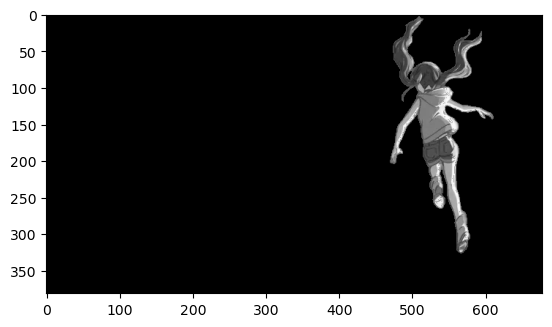

In [117]:
difference_single = compute_difference(bg1_image, ob_image)
plt.imshow(difference_single, cmap='gray')

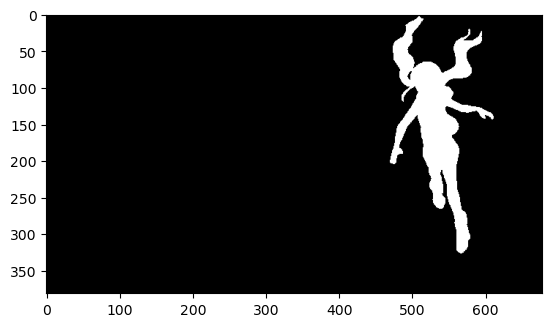

In [119]:
binary = compute_binary_mask(difference_single)
plt.imshow(binary)

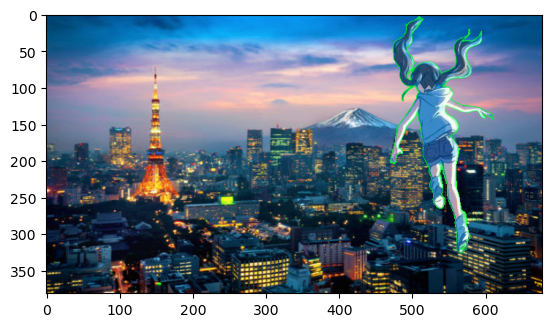

In [120]:
def replace_background(bg1_image, bg2_image, ob_image):
    difference_single_channel = compute_difference(bg1_image, ob_image)
    binary_mask = compute_binary_mask(difference_single_channel)
    output = np.where(binary_mask==255, ob_image, bg2_image)
    return output

replaced = replace_background(bg1_image, bg2_image, ob_image)
plt.imshow(replaced[:,:,::-1])